## Visual data analysis in Python


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'


In [73]:
df = pd.read_csv("../data/telecom_churn.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### 1. Univariate visualization (одномерная визуализация)

При одномерной визуализации мы рассматриваем фичу, в отрыве от остальных. Обычно интересуемся распределением ее значений.

#### 1.1 Quantitative features
Колличественные признаки принимают числовые значения. Как дескретные (int), так и непрерывные (float).

#### Гистограммы и графики плотности

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

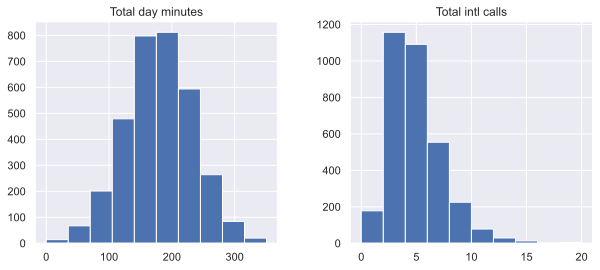

In [74]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10,4))

Гистограмма групирует значения в батчи, определенного диапазона.
Форма гистограммы поможет определить распределение величины. Знать его необходимо для некотрых ml методов.

Левый график распределено нормально, когда правый сильно смещен влево.

Также рассмотреть распределение можно с помощью `Kernel Density Plots`. Можно сказать, что это более правная гистограма.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

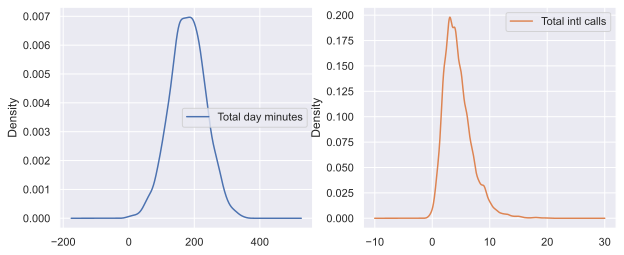

In [75]:
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

Так же можно построить график распределения с помошью `seaborn` `histplot()`. 
Пример гистограмы с оценкой плотности ядра *(KDE)*

<Axes: xlabel='Total intl calls', ylabel='Density'>

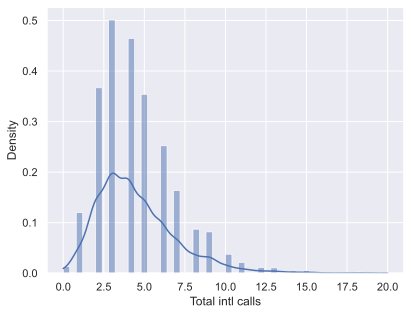

In [76]:
sns.histplot(df['Total intl calls'], kde=True, stat="density")

Высота столбцов гистограммы здесь нормирована и показывает плотность, а не количество образцов в каждой ячейке.

### Box plot
Состоит он из коробки, усов, отдельных выбросов.

**Коробка** - иллюстрирует межквартильное распределение. Его длина от 25 до 75 процентиля. Вертикальная линия посередине - медиана (50% распределения)

**Усы** - Показывают точеи в интервале $(Q_1 - 1.5*IQR, Q_3+1.5*IQR)$, где $IQR = Q_3-Q_1$

**Выбросы** - точки не попавшие в диапазон


<Axes: xlabel='Total intl calls'>

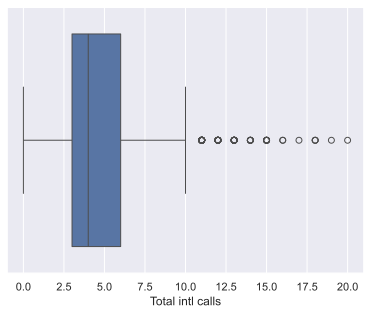

In [77]:
sns.boxplot(x="Total intl calls", data=df)

### Violin plot

Последний тип гарфиков распредления - violin plot.

Вот его сравнение с box plot

<Axes: ylabel='Total intl calls'>

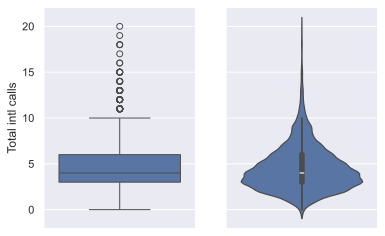

In [78]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

#### 1.2 Categorical and binary features
Note: если значения категорального признака упорядочены, то он называется порядковым

### Bar plot
Столбчатая диаграмма - визуальное представление таблицы частот.

`seaborn` - `countplot()` и `barplot`

<Axes: xlabel='Customer service calls', ylabel='count'>

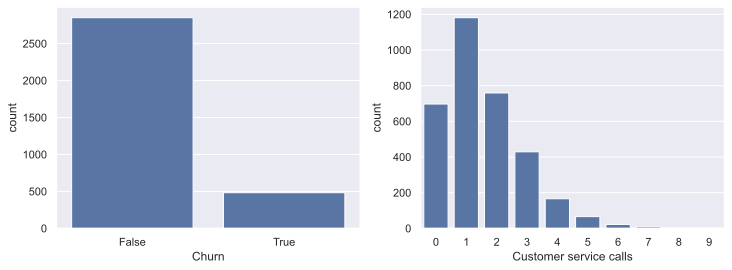

In [79]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1])

**Разница между гистограмами и столбчатыми графиками**
1. Гистограмы используются, исследования распределения численных значений. bar plot - для категоральных признаков.
2. Ось абцис в histogram численная, в столбчатой - какая угодно
3. 

## Multivariate visualization
Позволяют рассмотреть отношения между несколькими перемеными.

Выбор графика зависит от того зависимости каких типов мы рассматриваем.

### Quantitative vs Quantitative

#### Correlation matrix (матрица кореляции)
Используя метод `corr()` на df, посчитаем кореляцию между парами всех численных признаков.
Передадим полученную матрицу в `seaborn.heatmap()`

<Axes: >

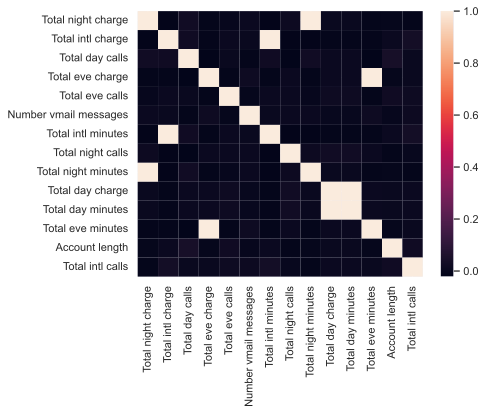

In [80]:
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

Из данной матрици мы видим, что у 4 переменных которые полностью корелируют. Такие называются записимыми. Удалим их

<Axes: >

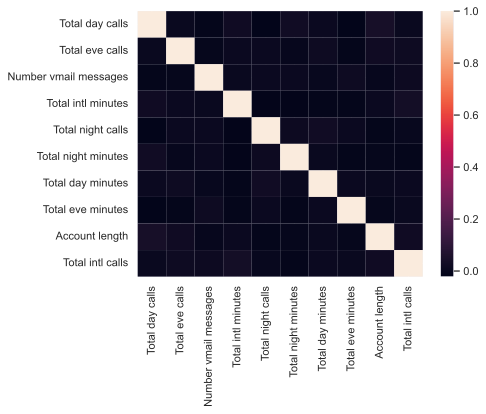

In [81]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

### Scatter plot
Точечный график - показывает значение 2/3 переменных в виде декартовых координат

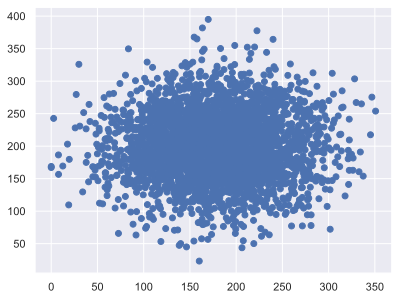

In [82]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

Получили 2 нормально распределенных переменных, которые не корелируют, т.к. мы получили элипс выровненный по осям

Также это можно сделать используя `seaborn`

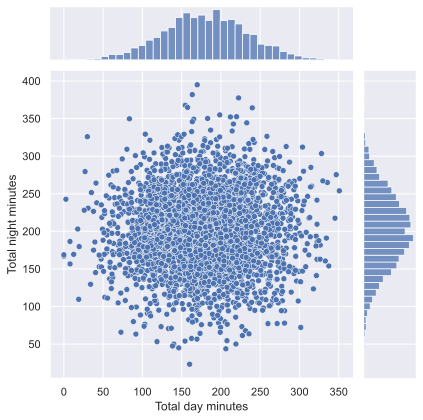

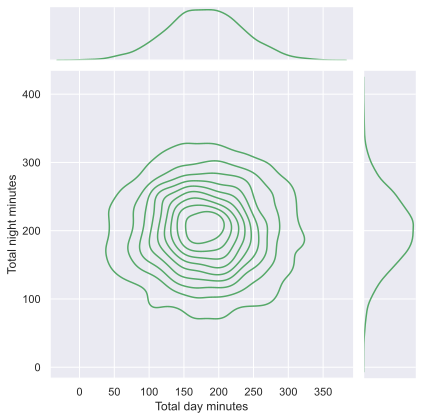

In [83]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter", )
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g")


### Матрица рассеивания
На диагонали - распределение величины, на пересечение графики рассеивания величин

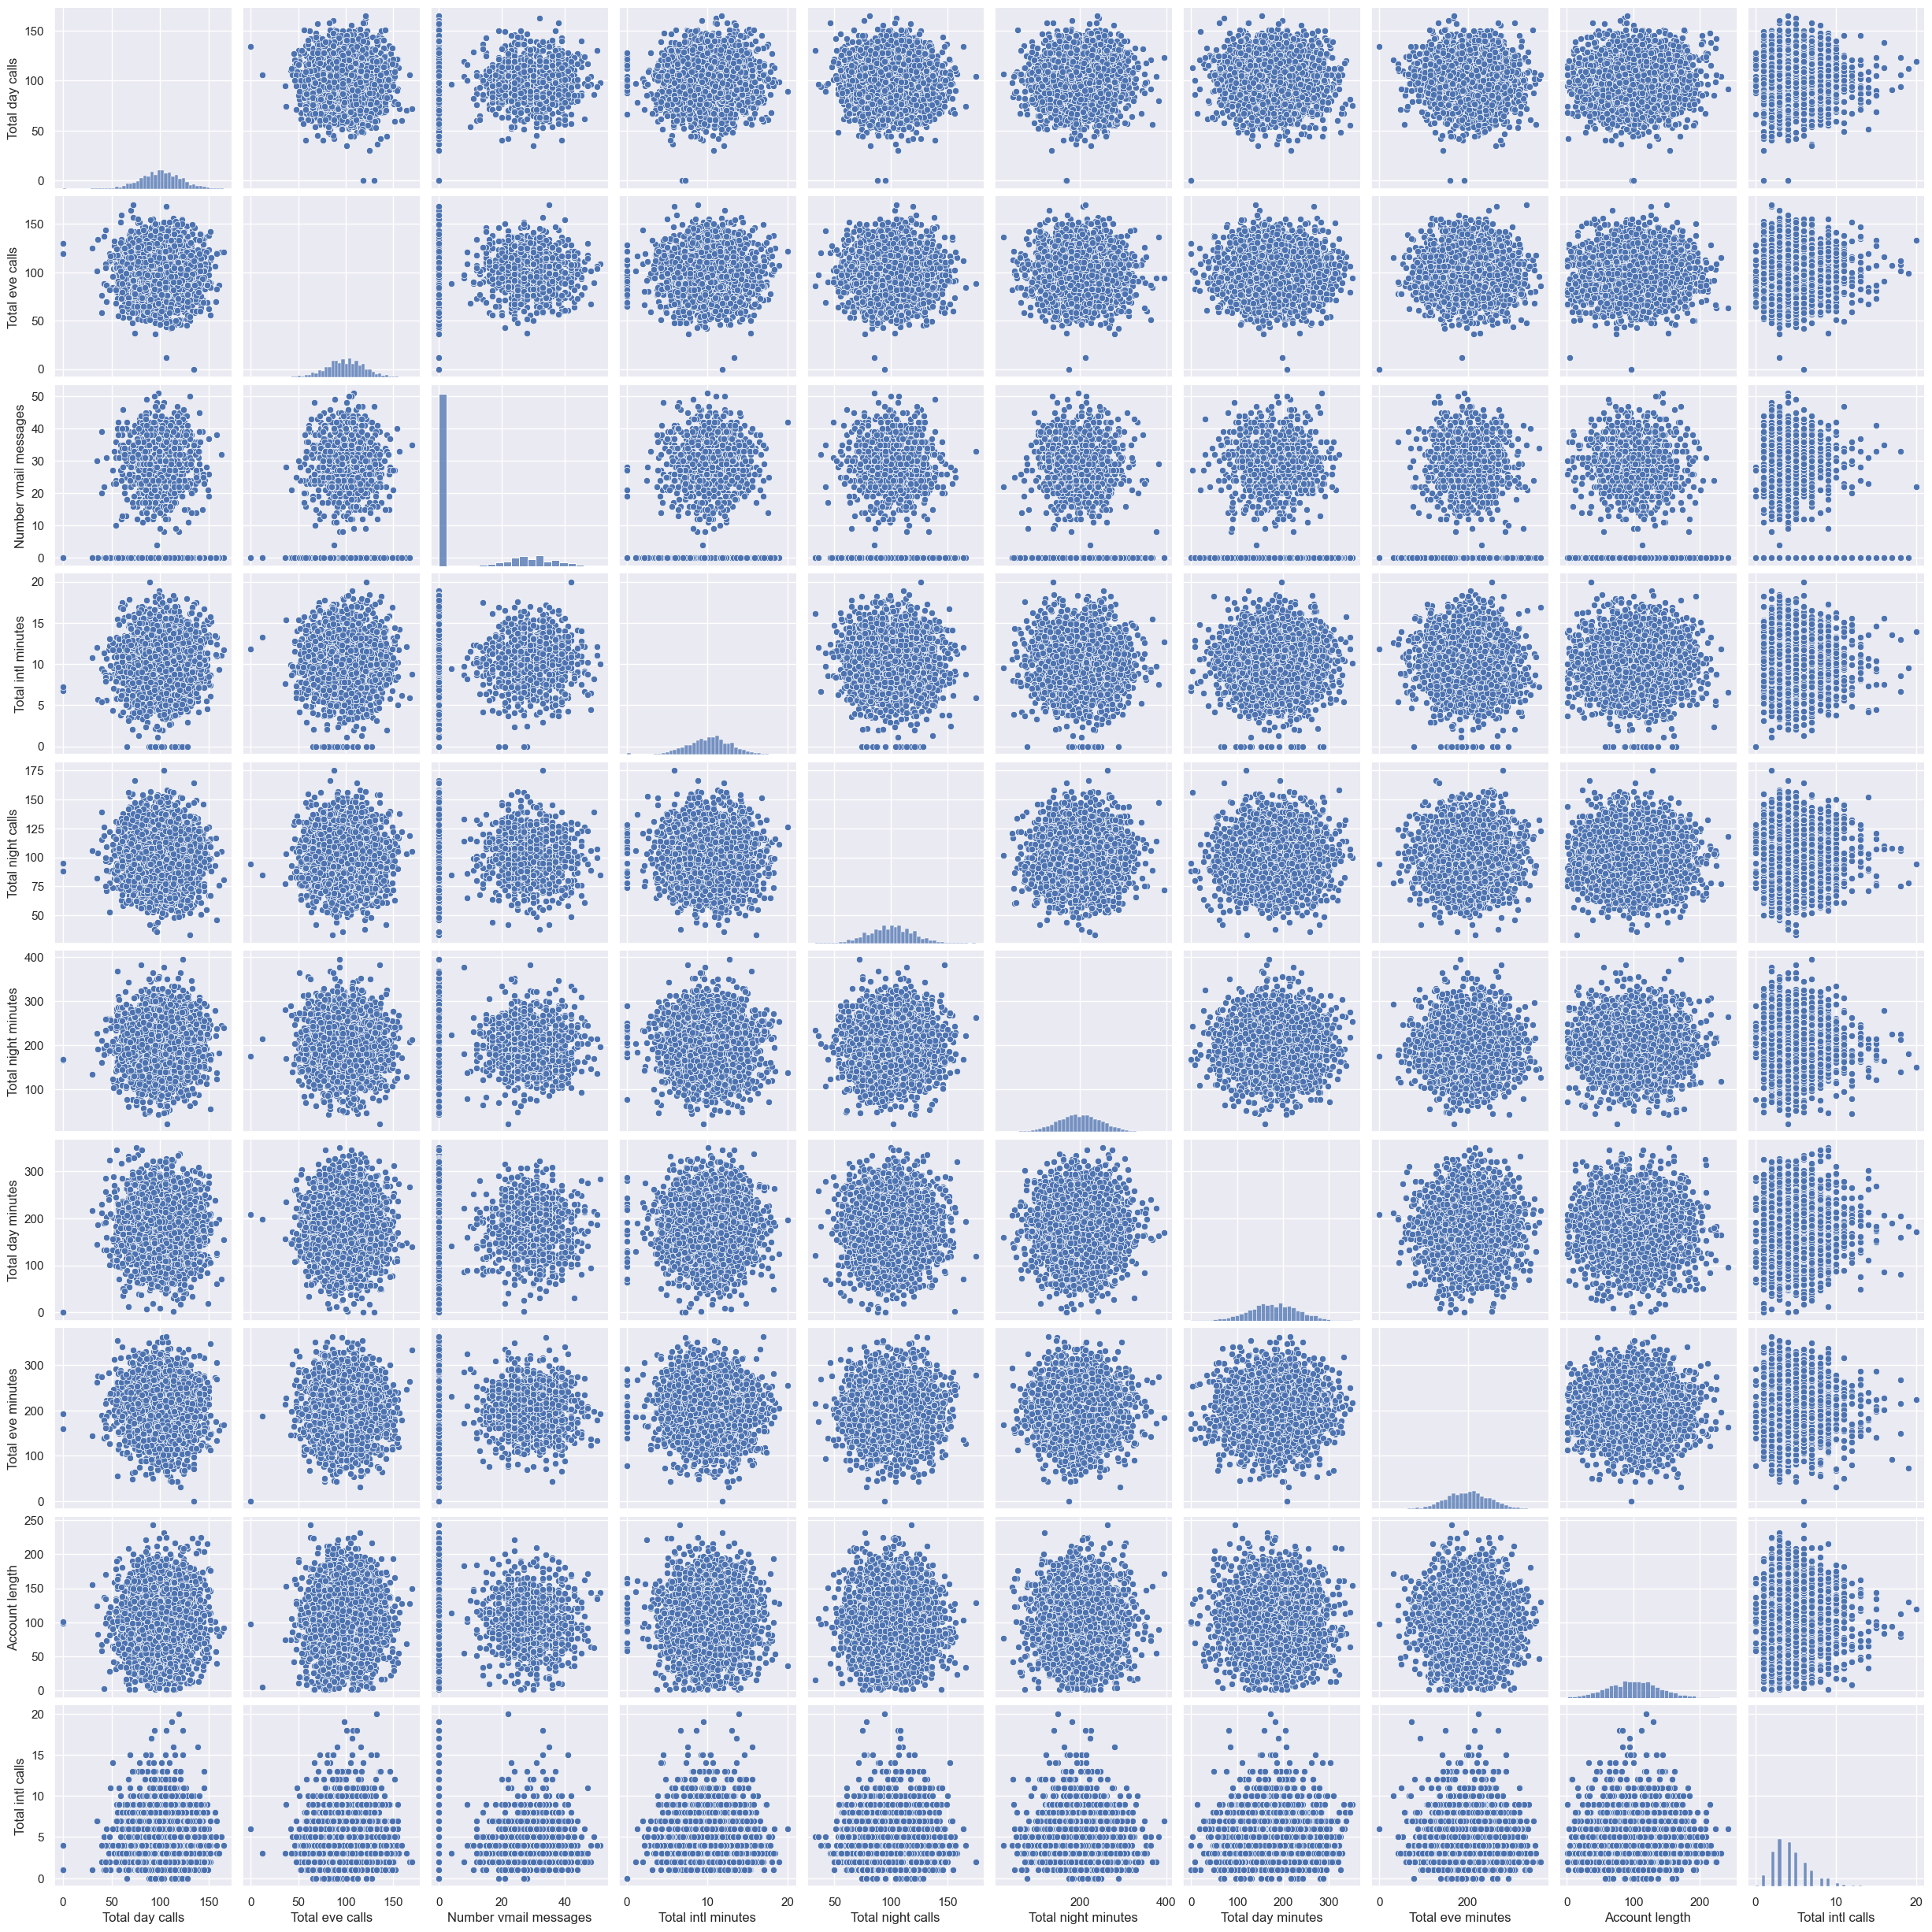

In [84]:

%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]) # стоит переключ

In [85]:
%config InlineBackend.figure_format = 'svg'

Иногда подобный график может помочь сделать выводы о данных, но в этом случае все довольно ясно и без сюрпризов 

## Quantitative vs Categorical

Сейчас мы попытаемся сделать графики, более полезными. Мы постараемся получить новые идеи для прогнозированния отттока из взаимодействия между катигоральными и числовыми особенностями

Для `scatter plots` можно отобразить третью переменную. Так-же для это есть `lmplot`, в нем 3 параметра, мы можем отобразить, раскрасив точки

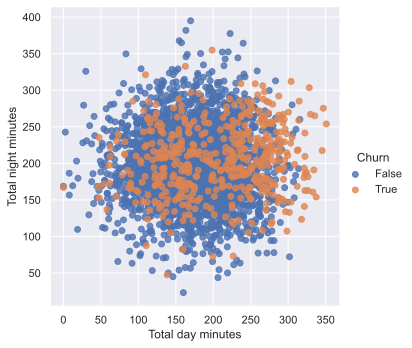

In [86]:
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False
)

Из графика мы видим, что малая часть нелояльных смешена вверх, право, то есть те кто много говорят и говорят ночью. Но выводов из этого особо не сделать


Теперь проанализируем числовые величины в для churn false и true

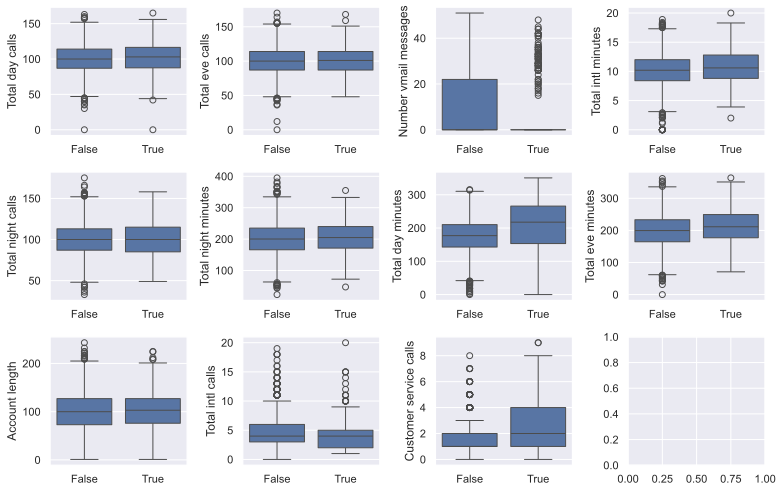

In [87]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11,7) )
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

Заметим, что большое несоответствие наблюдается в: `Total day calls`, `Number vmail messages`, `Customer service calls`

<Axes: xlabel='Churn', ylabel='Total day minutes'>

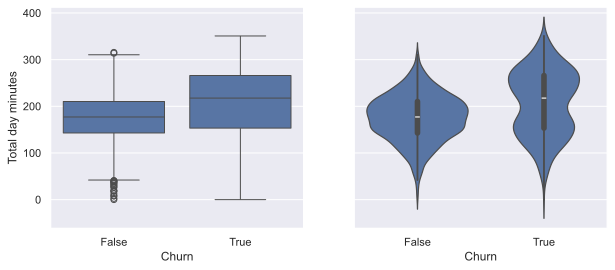

In [95]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))
sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1])

Скрипичный график, не принес ничего нового. Из коробочного ясно, что нелояльные клиенты больше разговариют по телефону. 


Графики численной переменной, расмотренной по 2 категоральным признакам сразу

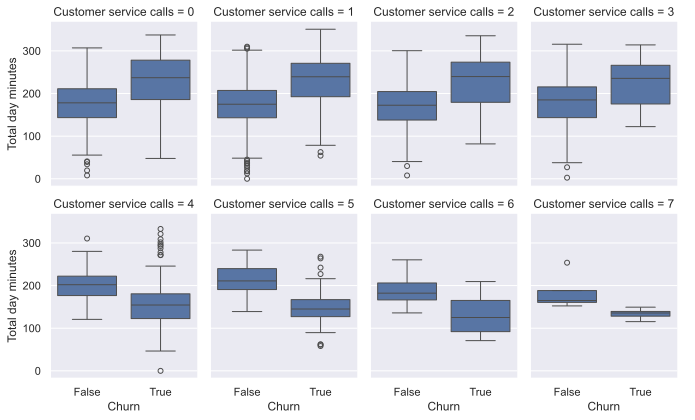

In [96]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
)

## Categorical vs. Categorical

Рассмотрим распределение числа звонков в поддрежку

<Axes: xlabel='Customer service calls', ylabel='count'>

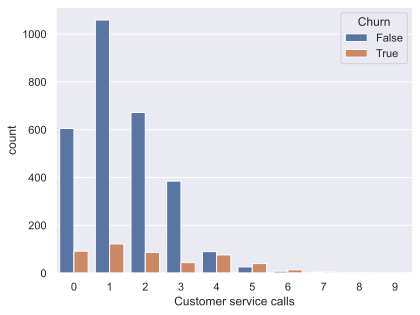

In [97]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

**Вывод:** скорость оттока значительно увеличивается, после 4 звонка в поддержку

<Axes: xlabel='Voice mail plan', ylabel='count'>

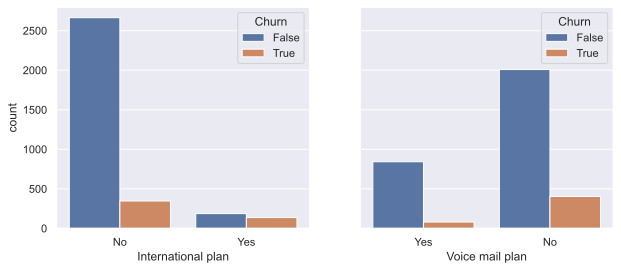

In [102]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

**Вывод:** Международный план сильно влияет, на отказы. Голосовая почта нет  

## Визуализация всего набора данных

$\exists$ ряд способов для визуализации всего датасета сразу.

Можно сделать это в лоб используя `pairplot()` но мы рассмотрим все пары данных, а не весь датасет.

Также есть метод снижения размерности и t-SNE. Далее рассмотрим t-SNE

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** — это метод снижения размерности, который используется для визуализации многомерных данных. Его главная цель — представить высокоразмерные данные (например, 128-мерные вектора признаков) в 2D или 3D пространстве так, чтобы сохранить локальные структуры данных, то есть чтобы близкие точки в высокоразмерном пространстве оставались близкими в низкоразмерном.



In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# удалим state и churn
# Yes/No преобразуем - в bool
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

Теперь нормализуем данные. Для этого вычтем из каждой переменной среднее и разделим ее на среднеквадратичное отклонение.

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

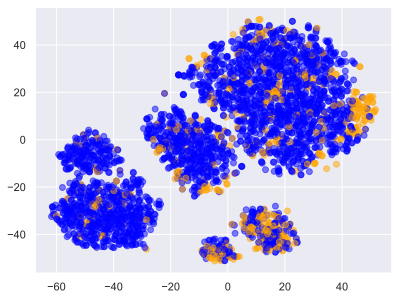

In [115]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1],c=df["Churn"].map({False:"blue", True: "orange"}), alpha=.5)

Мы видим, что нелояльные клиенты сосредоточены в нескольких группках.

Чтобы лучше понять картину, мы может раскрасить еще по другим признакам

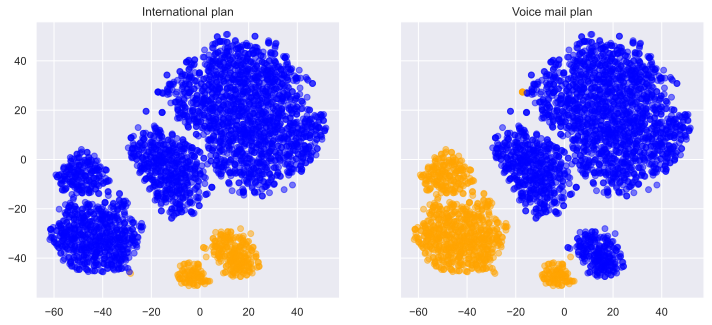

In [118]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c = df[name].map({"Yes":"orange", "No":"blue"}),
        alpha=.5,
    )
    axes[i].set_title(name)

Из этого ясно видно, что есть кластер нелояльных людей, имеющих межд план, но не имеющих голосовой почты

**Недостатки t-SNE**

1. Требует много вычеслительных ресурсов. 
2. График может сильно изменяться из-за случайных величин. Не стоит делать из него окончательные выводы. Только выдвигать гипотезы, которые в последствии чательно проверять